# Advection Equation Plotter

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sp
import imageio
import os

In [2]:
# Unfiorm initial function (step function)
def uniform (min_val, max_val, vector):
    
    v1 = np.zeros(len(vector))
    
    for i in range(len(vector)):
        if (vector[i] >= min_val and vector[i] <= max_val):
            v1[i] = 1 
        
    return v1

## Data Loading function

This function loads the data from the output files and sort them from the lowest number of points to the highest

In [5]:
def Data_download (cf_vector, n_points, method):

    data_1, data_2, data_3 = [],[],[]

    sorted_sol, sorted_norm, sorted_var = [],[],[]
    
    sorting_sol = [[] for i in range(len(n_points))]
    sorting_norm = [[] for i in range(len(n_points))]
    sorting_var = [[] for i in range(len(n_points))]
    
    data_sol = [[] for i in range(len(cf_vector))]
    data_norm = [[] for i in range(len(cf_vector))]
    data_var = [[] for i in range(len(cf_vector))]
   
    path_1 = str(method) + '/Solutions'
    path_2 = str(method) + '/Norms'
    path_3 = str(method) + '/Tot_var'

    for filename in os.listdir(path_1):
        data_1.append(np.load(os.path.join(path_1, filename)))

    for filename in os.listdir(path_1):
        data_2.append(np.load(os.path.join(path_2, filename)))

    for filename in os.listdir(path_3):
        data_3.append(np.load(os.path.join(path_3, filename)))

    for j in range(len(n_points)):
        for i in range(len(data_1)):

            if data_1[i]['n_points'] == n_points[j]:
                sorting_sol[j].append(data_1[i])
                sorting_norm[j].append(data_2[i])
                sorting_var[j].append(data_3[i])

    for i in range(len(sorting_sol)):
        
        sorted_sol += sorting_sol[i]
        sorted_norm += sorting_norm[i]
        sorted_var += sorting_var[i]

    
    
   # for i in range(len(sorted_sol)):
     #   print(sorted_sol[i])
    
    for k in range(len(sorted_sol)):
        for j in range(len(cf_vector)):
            
            if sorted_sol[k]['cf'] == cf_vector[j]:
                    data_sol[j].append(sorted_sol[k])
                    
    for k in range(len(sorted_norm)):
        for j in range(len(cf_vector)):
                
            if sorted_norm[k]['cf'] == cf_vector[j]:
                    data_norm[j].append(sorted_norm[k])

    for k in range(len(sorted_var)):
        for j in range(len(cf_vector)):
                
            if sorted_var[k]['cf'] == cf_vector[j]:
                    data_var[j].append(sorted_var[k])

        
    return data_sol, data_norm, data_var
                

## FTCS

In general, I used the cf set and the number of points indicated here, I defined them here.

IMPORTANT: Before runnign the cells to plot the graphs of a method, the cell with the Loading function for the method (first cell of each section) must be called

In [11]:
# FTCS 
x0 = 5  
cf_vector = [0.1, 0.3, 0.5, 0.8, 1]
n_points = [201, 402, 603, 804, 1005]
data_sol, data_norm, data_var = Data_download (cf_vector, n_points, 'FTCS')


In [ ]:
x0 = 5    

for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][j]['x_grid'], np.exp(-(data_sol[-1][j]['x_grid']-x0)**2), color = 'black', ls = '--', lw = 2)
    plt.title('FTCS: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    plt.ylim(0, 1.1)
    plt.show()



In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.title('FTCS: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Space')
    plt.yscale('log')
    plt.legend()
    plt.show()


## LF GAUSSIAN

In [ ]:
# LF GAUSSIAN 

cf_vector = [0.1, 0.3, 0.5, 0.8, 1]
n_points = [201, 402, 603, 804, 1005]
data_sol, data_norm, data_var = Data_download (cf_vector, n_points, 'LF_Gauss')


In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][j]['x_grid'], np.exp(-(data_sol[-1][j]['x_grid']-x0)**2), color = 'black', ls = '--', lw = 2)
    plt.title('LF: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    plt.show()


In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_norm[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm']/data_norm[i][j]['L2_norm'][0], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)

    plt.title('LF: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Space')
    plt.yscale('log')
    plt.legend()
    plt.show()

# For cf = 1, change the scale!

## LEAPFROG GAUSSIAN

In [ ]:
data_sol, data_norm, data_var = Data_download (cf_vector, n_points, 'Leapfrog')

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][j]['x_grid'], np.exp(-(data_sol[-1][j]['x_grid']-x0)**2), color = 'black', ls = '--', lw = 2)
    plt.title('Leapfrog: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    plt.ylim(0.7, 1.1)
    plt.xlim(4.25,5.75)
    plt.show()


In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_norm[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm']/data_norm[i][j]['L2_norm'][0], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)

    plt.title('Leapfrog: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Space')
    plt.yscale('log')
    plt.legend()
    plt.show()

# for cf = 1, change the scale

## LW GAUSSIAN

In [ ]:
# LW GAUSSIAN 
n_points_LW = [101, 201, 402, 603, 804, 1005]
data_sol, data_norm, data_var = Data_download (cf_vector, n_points_LW ,'LW_Gauss')

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][j]['x_grid'], np.exp(-(data_sol[-1][j]['x_grid']-x0)**2), color = 'black', ls = '--', lw = 2)
    plt.title('LW: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    plt.show()


In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][j]['x_grid'], np.exp(-(data_sol[-1][j]['x_grid']-x0)**2), color = 'black', ls = '--', lw = 2)
    plt.title('LW: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    plt.ylim(0.75, 1.1)
    plt.xlim(4.25, 5.75)
    plt.show()

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_norm[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm']/data_norm[i][j]['L2_norm'][0], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)

    plt.title('LW: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Time')
    plt.legend()
    plt.show()


In [ ]:
for i in range(len(cf_vector)):
        
    plt.plot(data_norm[i][3]['time'], data_norm[i][3]['L2_norm']/data_norm[i][3]['L2_norm'][0], label = 'cf: ' + str(data_sol[i][3]['cf']), lw = 2)

plt.title('LW Norm comparison')
plt.xlabel('Time')
plt.yscale('log')
plt.legend()
plt.show()

## LW STEP

In [13]:
# LW STEP 
n_points = [201, 402, 603, 804, 1005]
data_sol, data_norm, data_var = Data_download (cf_vector, n_points, 'LW_Step')


In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][-1]['x_grid'], uniform(4, 6, data_sol[-1][-1]['x_grid']), color = 'black', ls = '--', lw = 2)
    plt.title('LW: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    plt.show()

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_norm[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm']/data_norm[i][j]['L2_norm'][0], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)

    plt.title('LW: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Time')
    plt.yscale('log')
    plt.legend()
    plt.show()


In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_var[0])):
        
        plt.plot(data_var[i][j]['time'], data_var[i][j]['total_variations'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.title('LW: Total Variations -' + ' CF = ' + str(data_var[i][0]['cf']))
    plt.xlabel('Time')
    plt.yscale('log')
    plt.legend()
    plt.show()

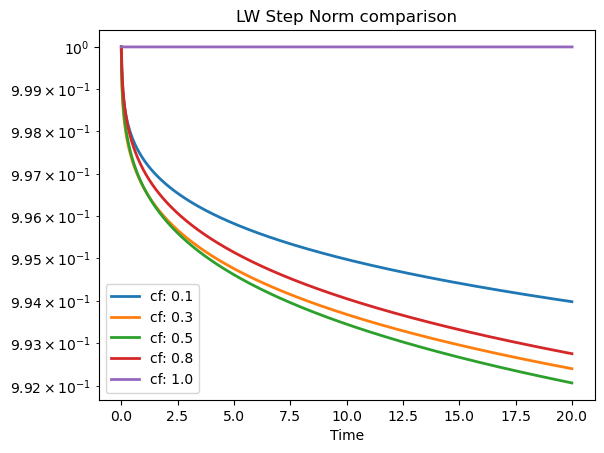

In [17]:
for i in range(len(cf_vector)):
        
    plt.plot(data_norm[i][3]['time'], data_norm[i][3]['L2_norm']/data_norm[i][3]['L2_norm'][0], label = 'cf: ' + str(data_sol[i][3]['cf']), lw = 2)

plt.title('LW Step Norm comparison')
plt.xlabel('Time')
plt.yscale('log')
plt.legend()
plt.show()

## LF STEP

In [ ]:
# LF STEP 
data_sol, data_norm, data_var = Data_download (cf_vector, n_points, 'LF_Step')

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][-1]['x_grid'], uniform(4, 6, data_sol[-1][-1]['x_grid']), color = 'black', ls = '--', lw = 2)
    plt.title('LF: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    plt.show()

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_norm[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm']/data_norm[i][j]['L2_norm'][0], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)

    plt.title('LF: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Time')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_var[0])):
        
        plt.plot(data_var[i][j]['time'], data_var[i][j]['total_variations'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.title('LF: Total Variations -' + ' CF = ' + str(data_var[i][0]['cf']))
    plt.xlabel('Time')
    plt.yscale('log')
    plt.legend()
    plt.show()

## LF OUTFLOW

In [19]:
# LF GAUSS OUTFLOW
data_sol, data_norm, data_var = Data_download (cf_vector, n_points, 'LF_Outflow')


In [ ]:
x0 = 5    

for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][j]['x_grid'], np.exp(-(data_sol[-1][j]['x_grid']-x0)**2), color = 'black', ls = '--', lw = 2)
    plt.title('LF: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    #plt.yscale('log')
    plt.show()

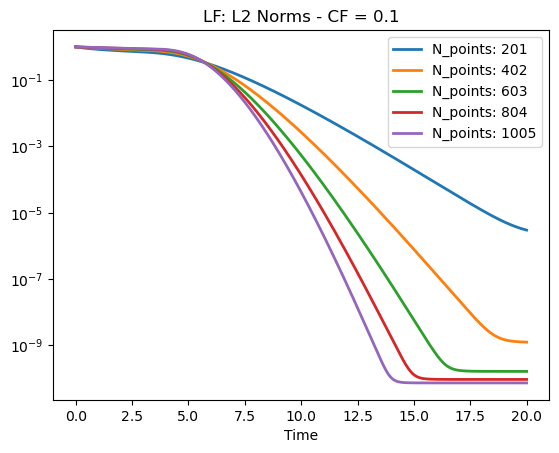

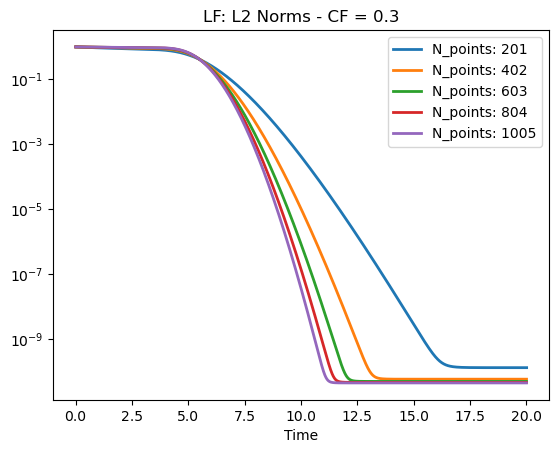

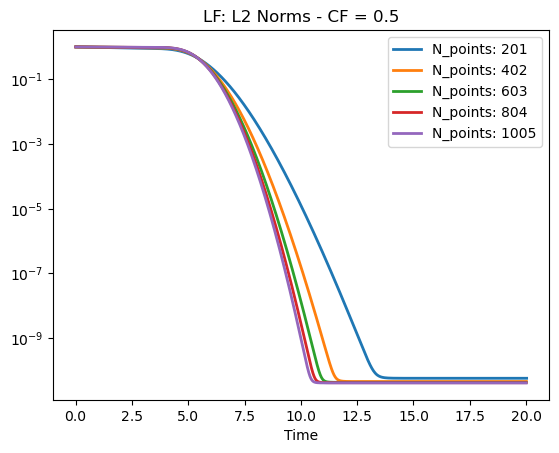

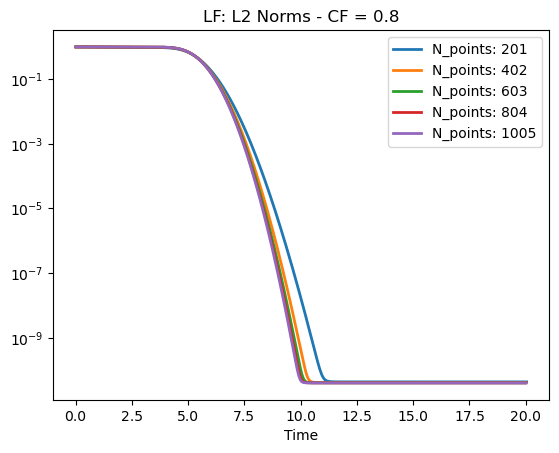

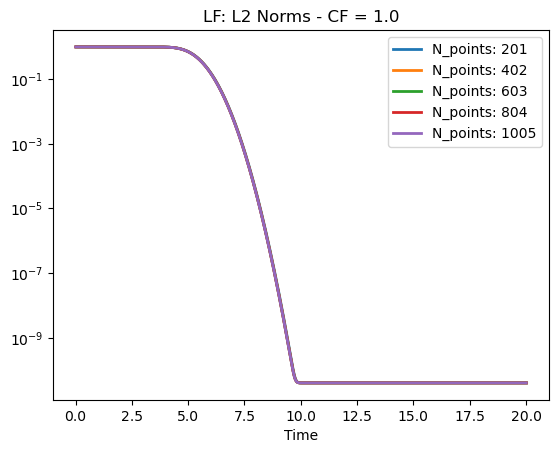

In [21]:
for i in range(len(cf_vector)):
    for j in range(len(data_norm[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm']/data_norm[i][j]['L2_norm'][0], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)

    plt.title('LF: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Time')
    plt.yscale('log')
    plt.legend()
    plt.yscale('log')
    plt.show()

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_var[0])):
        
        plt.plot(data_var[i][j]['time'], data_var[i][j]['total_variations'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.title('LF: Total Variations -' + ' CF = ' + str(data_var[i][0]['cf']))
    plt.xlabel('Time')
    plt.legend()
    plt.show()

## LW OUTFLOW

In [23]:
# LW GAUSS OUTFLOW

data_sol, data_norm, data_var = Data_download (cf_vector, n_points, 'LW_Outflow')

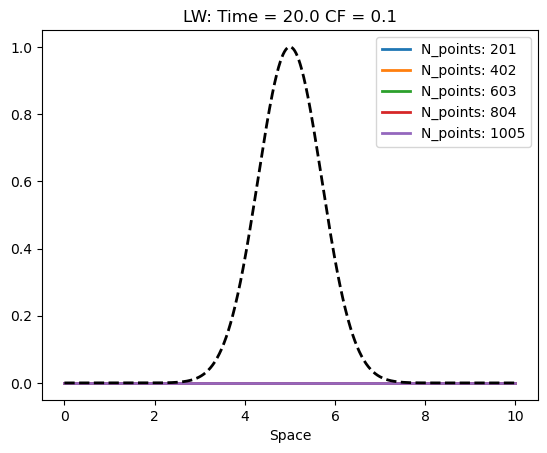

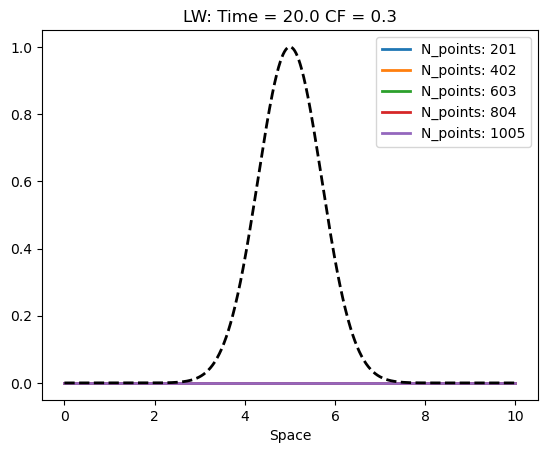

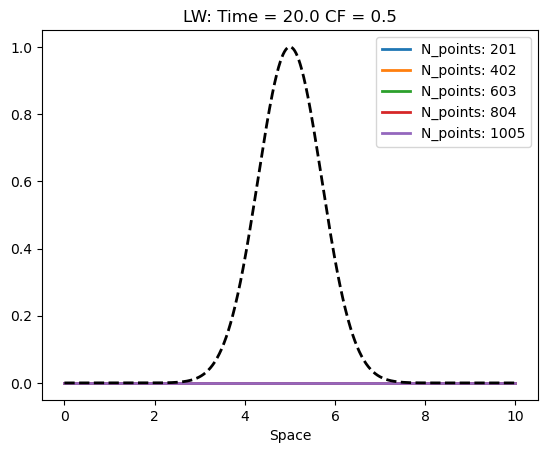

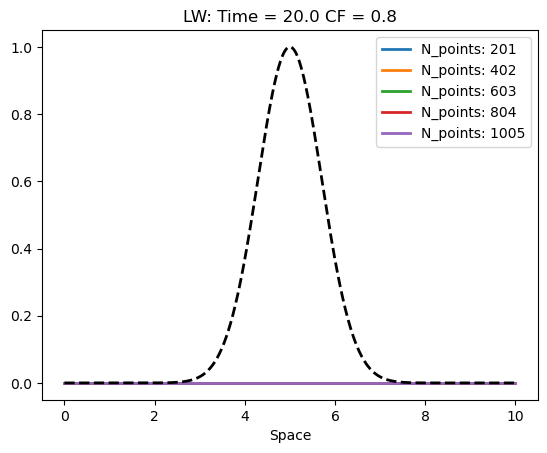

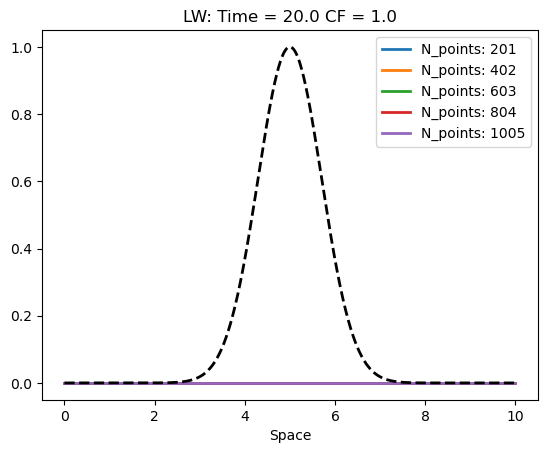

In [27]:
x0 = 5    

for i in range(len(cf_vector)):
    for j in range(len(data_sol[0])):
        
        plt.plot(data_sol[i][j]['x_grid'], data_sol[i][j]['sol'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.plot(data_sol[-1][j]['x_grid'], np.exp(-(data_sol[-1][j]['x_grid']-x0)**2), color = 'black', ls = '--', lw = 2)
    plt.title('LW: Time = 20.0' + ' CF = ' + str(data_sol[i][0]['cf']))
    plt.xlabel('Space')
    plt.legend()
    #plt.yscale('log')
    plt.show()

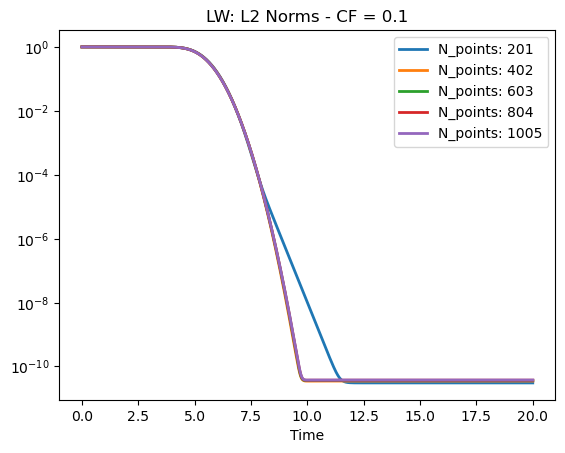

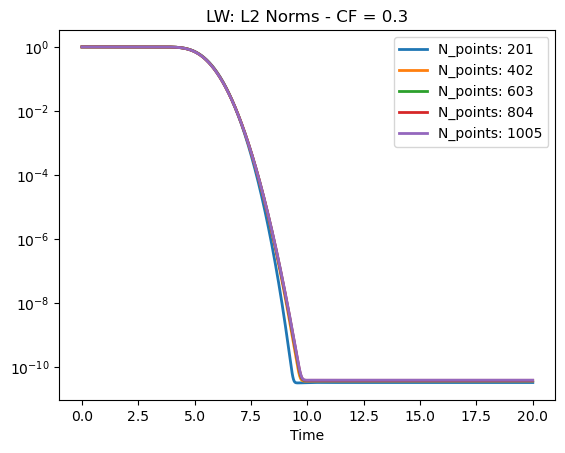

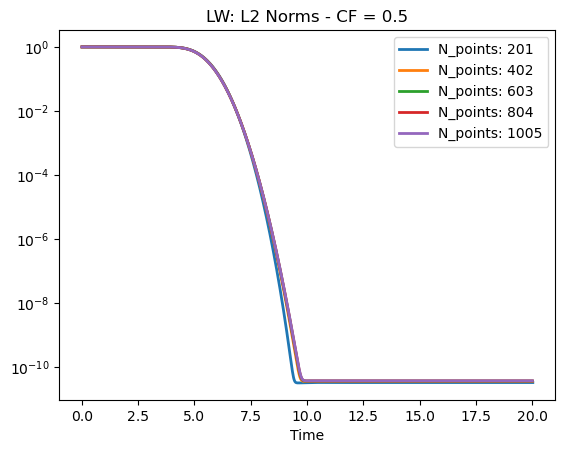

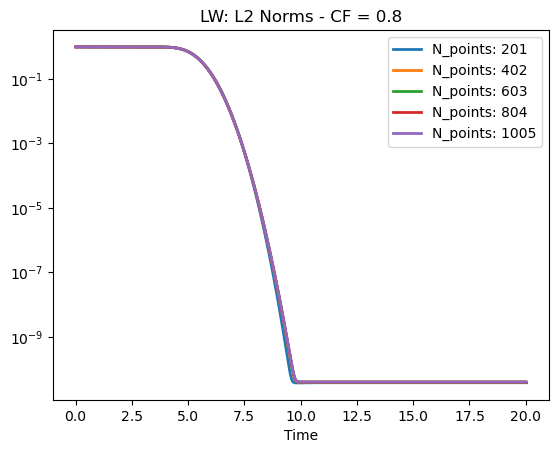

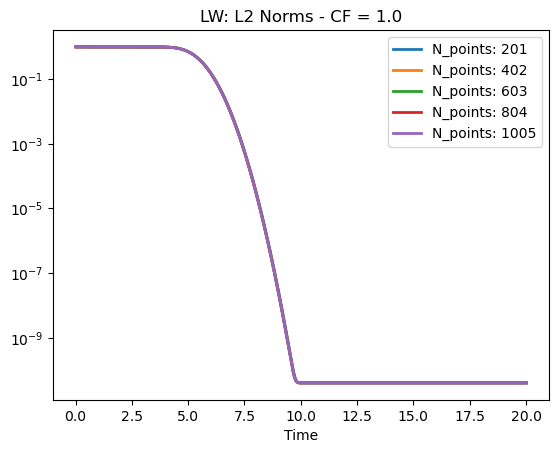

In [25]:
for i in range(len(cf_vector)):
    for j in range(len(data_norm[0])):
        
        plt.plot(data_norm[i][j]['time'], data_norm[i][j]['L2_norm']/data_norm[i][j]['L2_norm'][0], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)

    plt.title('LW: L2 Norms -' + ' CF = ' + str(data_norm[i][0]['cf']))
    plt.xlabel('Time')
    plt.yscale('log')
    plt.legend()
    plt.yscale('log')
    plt.show()

In [ ]:
for i in range(len(cf_vector)):
    for j in range(len(data_var[0])):
        
        plt.plot(data_var[i][j]['time'], data_var[i][j]['total_variations'], label = 'N_points: ' + str(len(data_sol[i][j]['x_grid'])), lw = 2)
    
    plt.title('LW: Total Variations -' + ' CF = ' + str(data_var[i][0]['cf']))
    plt.xlabel('Time')
    plt.legend()
    plt.show()